In [2]:
# pip install numpy
# pip install matplotlib
# !pip install pandas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Cereal analysis

In [4]:
df=pd.read_csv('cereal.csv')

## Content
### Fields in the dataset:

Name: Name of cereal <br> 
mfr: Manufacturer of cereal <br> 
A = American Home Food Products <br> 
G = General Mills <br> 
K = Kelloggs <br> 
N = Nabisco <br> 
P = Post <br>
Q = Quaker Oats <br> 
R = Ralston Purina <br> 
type: cold & hot <br> 
calories: calories per serving <br> 
protein: grams of protein <br> 
fat: grams of fat <br> 
sodium: milligrams of sodium <br> 
fiber: grams of dietary fiber <br> 
carbo: grams of complex carbohydrates <br> 
sugars: grams of sugars <br> 
potass: milligrams of potassium <br> 
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended <br> 
shelf: display shelf (1, 2, or 3, counting from the floor) <br> 
weight: weight in ounces of one serving <br> 
cups: number of cups in one serving <br> 
rating: a rating of the cereals (Possibly from Consumer Reports?) <br> 
Acknowledgements: <br> 
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. <br> 
The original source can be found here <br> 

This dataset has been converted to CSV <br> 

Inspiration <br> 

In [14]:
df.rename(columns={"mfr":"Manufacturer","potass":"Potassium","carbo":"Carbohydrates"},inplace=True)
df = df.sort_values("rating",ascending=False)
print("data frame orderd by rating:")
df.head(10)

data frame orderd by rating:


,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           77 non-null     object 
 1   Manufacturer   77 non-null     object 
 2   type           77 non-null     object 
 3   calories       77 non-null     int64  
 4   protein        77 non-null     int64  
 5   fat            77 non-null     int64  
 6   sodium         77 non-null     int64  
 7   fiber          77 non-null     float64
 8   Carbohydrates  77 non-null     float64
 9   sugars         77 non-null     int64  
 10  Potassium      77 non-null     int64  
 11  vitamins       77 non-null     int64  
 12  shelf          77 non-null     int64  
 13  weight         77 non-null     float64
 14  cups           77 non-null     float64
 15  rating         77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [11]:
print("data frame shape : ")
df.shape

data frame shape : 


(77, 16)

In [12]:
print("basic statistical information:")
df.describe()

basic statistical information:


,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Text(0.5, 0, 'rating')

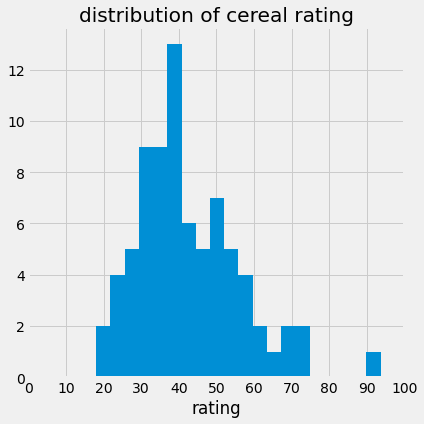

In [47]:
plt.figure(figsize=(6,6))
plt.hist(df["rating"],bins=20)
plt.title("distribution of cereal rating")
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel("rating")

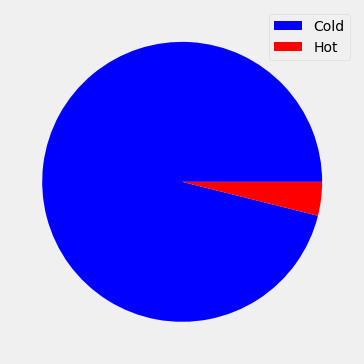

In [49]:
plt.figure(figsize=(6,6))
count_cold= len(df[df['type']=='C'])
count_hot= len(df[df['type']=='H'])
list_count_type = [count_cold,count_hot]
type_labels = ["Cold", "Hot"]
patches, texts = plt.pie(list_count_type, colors=['blue','red'])
plt.legend(patches, type_labels, loc="best")


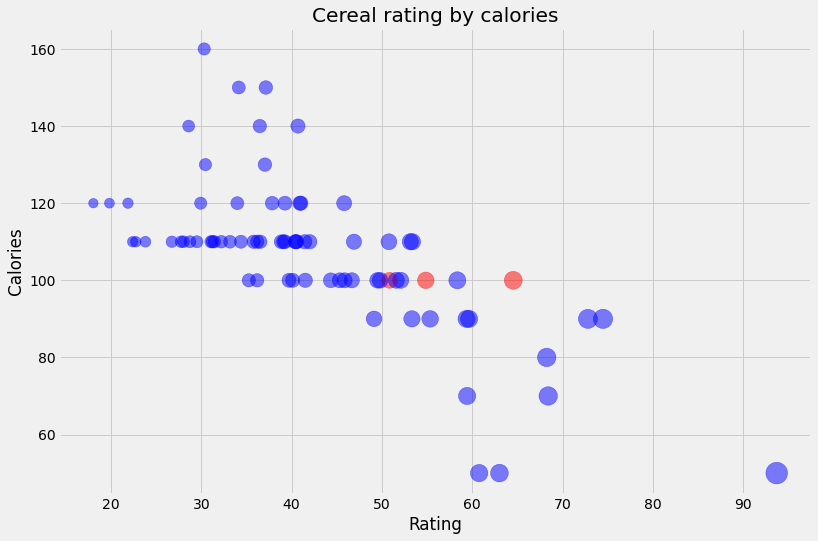

In [50]:
#set the creales prasentation(color) by there temperature
area = df['rating']*5
colors=[]
for i,r in df.iterrows() :
    if  r['type']=='C':
        colors.append('blue')
    else:
        colors.append('red')
        
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of rating versus calories
plt.scatter(df['rating'],df['calories'], s=area, c=colors, alpha=0.5)

# Create a title and axis labels
plt.title("Cereal rating by calories")
plt.xlabel('Rating') 
plt.ylabel('Calories') 

# Show the plot
plt.show()

### Conclusions:
It can be seen that the smaller the number of calories, the higher the rating of the product.